In [2]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


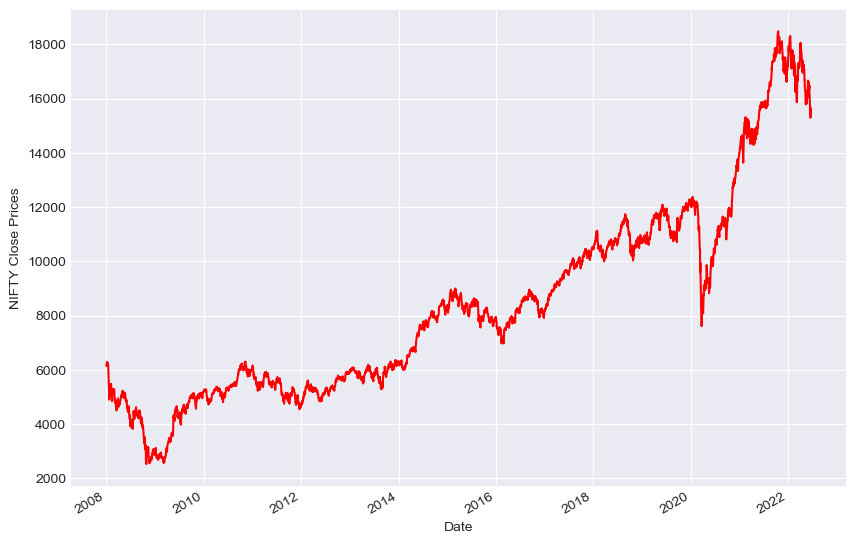

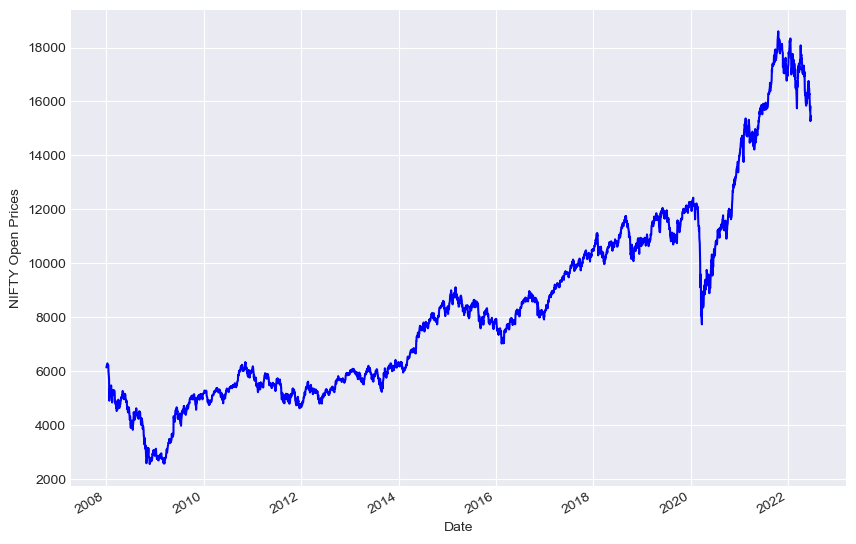

In [3]:
# Read data
Df = yf.download('^NSEI', '2008-01-01', '2022-06-22', auto_adjust=True)

# Only keep close columns
Df1 = Df[['Close']]
Df2 = Df[['Open']]

# Drop rows with missing values
Df1 = Df1.dropna()
Df2 = Df2.dropna()

# Plot the closing price of NIFTY
Df1.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("NIFTY Close Prices")
plt.show()

Df2.Open.plot(figsize=(10,7),color='b')
plt.ylabel("NIFTY Open Prices")
plt.show()

In [4]:
Df1.tail()

,Close
Date,
2022-06-15,15692.150391
2022-06-16,15360.599609
2022-06-17,15293.500000
2022-06-20,15350.150391
2022-06-21,15638.799805


In [5]:
Df2.tail()

,Open
Date,
2022-06-15,15729.250000
2022-06-16,15832.250000
2022-06-17,15272.650391
2022-06-20,15334.500000
2022-06-21,15455.950195


In [6]:
# Define explanatory variables for close
Df1['S_3'] = Df1['Close'].rolling(window=3).mean()
Df1['S_9'] = Df1['Close'].rolling(window=9).mean()
Df1['next_day_close_price'] = Df1['Close'].shift(-1)

Df1 = Df1.dropna()
X1 = Df1[['S_3', 'S_9']]

# Define dependent variable
y1 = Df1['next_day_close_price']

In [7]:
# Define explanatory variables for close
Df2['S_3'] = Df2['Open'].rolling(window=3).mean()
Df2['S_9'] = Df2['Open'].rolling(window=9).mean()
Df2['next_day_open_price'] = Df2['Open'].shift(-1)

Df2 = Df2.dropna()
X2 = Df2[['S_3', 'S_9']]

# Define dependent variable
y2 = Df2['next_day_open_price']

In [9]:
X2.shape

(3534, 2)

In [10]:
Df1.tail()

,Close,S_3,S_9,next_day_close_price
Date,,,,
2022-06-14,15732.099609,15902.766602,16304.538954,15692.150391
2022-06-15,15692.150391,15732.883464,16200.555664,15360.599609
2022-06-16,15360.599609,15594.949870,16064.588867,15293.500000
2022-06-17,15293.500000,15448.750000,15922.805447,15350.150391
2022-06-20,15350.150391,15334.750000,15804.338867,15638.799805


In [11]:
Df2.tail()

,Open,S_3,S_9,next_day_open_price
Date,,,,
2022-06-14,15674.250000,15945.250000,16313.127604,15729.250000
2022-06-15,15729.250000,15760.349935,16229.527561,15832.250000
2022-06-16,15832.250000,15745.250000,16126.260851,15272.650391
2022-06-17,15272.650391,15611.383464,15986.477648,15334.500000
2022-06-20,15334.500000,15479.800130,15860.355469,15455.950195


In [12]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X1_train = X1[:t]
y1_train = y1[:t]

# Test dataset
X1_test = X1[t:]
y1_test = y1[t:]

In [13]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X2_train = X2[:t]
y2_train = y2[:t]

# Test dataset
X2_test = X2[t:]
y2_test = y2[t:]

In [14]:
print(y1_test.shape)
print(y2_test.shape)

(700,)
(700,)


In [15]:
# Create a linear regression model for close prices
linear = LinearRegression().fit(X1_train, y1_train)
print("Linear Regression model")
print("NIFTY Close Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
NIFTY Close Price (y) = 1.18 * 3 Days Moving Average (x1) + -0.18 * 9 Days Moving Average (x2) + 3.94 (constant)


In [16]:
# Create a linear regression model for open prices
linear = LinearRegression().fit(X2_train, y2_train)
print("Linear Regression model")
print("NIFTY Open Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
NIFTY Open Price (y) = 1.19 * 3 Days Moving Average (x1) + -0.19 * 9 Days Moving Average (x2) + 3.73 (constant)


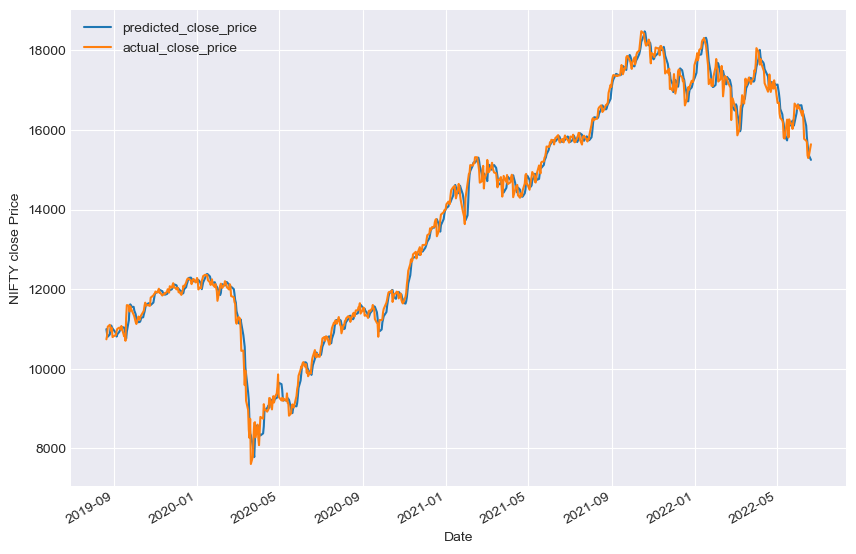

In [17]:
# Predicting the NIFTY close prices
predicted_close_price = linear.predict(X1_test)
predicted_close_price = pd.DataFrame(
    predicted_close_price, index=y1_test.index, columns=['price'])
predicted_close_price.plot(figsize=(10, 7))
y1_test.plot()
plt.legend(['predicted_close_price', 'actual_close_price'])
plt.ylabel("NIFTY close Price")
plt.show()

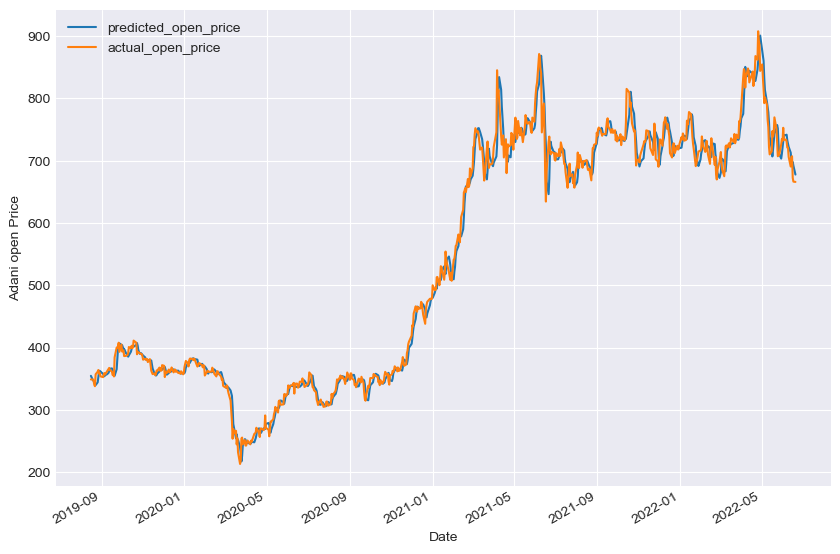

In [98]:
# Predicting the NIFTY close prices
predicted_open_price = linear.predict(X2_test)
predicted_open_price = pd.DataFrame(
    predicted_open_price, index=y2_test.index, columns=['price'])
predicted_open_price.plot(figsize=(10, 7))
y2_test.plot()
plt.legend(['predicted_open_price', 'actual_open_price'])
plt.ylabel("NIFTY open Price")
plt.show()

In [101]:
NIFTY = pd.DataFrame()
NIFTY['Open']=Df2[t:]['Open']
NIFTY['Close']=Df1[t:]['Close']
NIFTY['next_day_open_price']=y2_test
NIFTY['next_day_close_price']=y1_test
close=np.array(NIFTY['Close'])
next_day_open_price=np.array(NIFTY['next_day_open_price'])
change=(next_day_open_price-close)/close*100
NIFTY['change']=change
NIFTY

,Open,Close,next_day_open_price,next_day_close_price,change
Date,,,,,
2019-08-16,347.302143,348.570221,348.814056,348.618958,0.069953
2019-08-19,348.814056,348.618958,348.618975,346.229187,0.000005
2019-08-20,348.618975,346.229187,346.277959,342.083618,0.014087
2019-08-21,346.277959,342.083618,340.230253,336.572388,-0.541787
2019-08-22,340.230253,336.572388,337.889221,340.766754,0.391248
...,...,...,...,...,...
2022-06-14,690.615741,699.851746,706.009097,698.908264,0.879808
2022-06-15,706.009097,698.908264,707.051830,677.009949,1.165184
2022-06-16,707.051830,677.009949,672.342260,664.347656,-0.689456
